In [1]:
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Sequential
from keras_preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import random
import pandas as pd
import numpy as np
TRAIN_SIZE = 0.8
#MAX_NB_WORDS = 100
#MAX_SEQUENCE_LENGTH = 10

MAX_NB_WORDS = 30
MAX_SEQUENCE_LENGTH = 30



In [57]:

#df2=pd.read_csv('../input/simpson-txt-eng-clean/simpson_clean_engtext.csv', encoding='latin-1', error_bad_lines= False)
#df2=pd.read_csv('../input/semeval-t13/all_labelled_t13.csv', encoding='latin-1', error_bad_lines= False)
df2=pd.read_csv('../input/mvsa-single-afinn-labelling/mvsa_single_affin_labelling.csv', encoding='latin-1', error_bad_lines= False)
#df['text']=df['wstem'].astype(str)
print(df2)
#print(df2)


        ID                                             text_x text_label  \
0        1      How I feel today #legday #jelly #aching #gym     neutral   
1        2  grattis min griskulting!!!???? va bara tvungen...    neutral   
2        3  RT @polynminion: The moment I found my favouri...    neutral   
3        4  #escort We have a young and energetic team and...   positive   
4        5  RT @chrisashaffer: Went to SSC today to be a "...   positive   
...    ...                                                ...        ...   
4696  5125           http://t.co/Y4ZrSmq2KB http://t.co/LÂ¡Â­    neutral   
4697  5126  YES! #sinful #food #freefrom #glutenfree #suga...   positive   
4698  5127  RT @bookmyshow: #Disney's lies - "Every day is...   positive   
4699  5128  RT @MUBMI: TWO MORE DAYS to submit your apps #...    neutral   
4700  5129  RT @khununeos: khun was literally me whenever ...   positive   

     image_label                                              ctext  img_path  \
0     

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
dff2=df2.rename(columns={"file_name":"img_file"})

dff2

,image_path,img_file,visual_label,text_label,joint_label,ctext,vlabel,tlabel,jlabel
0,Dataset\img00021.jpg,img00021.jpg,0,1,0,white power movement new book connect movement...,negative,neutral,negative
1,Dataset\img00024.jpg,img00024.jpg,1,0,0,lhate lama youral hat usiw anyth work jour tor...,neutral,negative,negative
2,Dataset\img00025.jpg,img00025.jpg,2,1,1,rahe tay eff orceim immigr lettingilleg stay a...,positive,neutral,neutral
3,Dataset\img00027.jpg,img00027.jpg,1,0,0,fuck dirti fuck paki stinki fuck immigr fuck s...,neutral,negative,negative
4,Dataset\img00028.jpg,img00028.jpg,1,1,1,mean mmnot say say chat illeg immigr ral whisper,neutral,neutral,neutral
...,...,...,...,...,...,...,...,...,...
2847,Dataset\img09219.jpg,img09219.jpg,0,0,0,must secur exist futur white children david lane,negative,negative,negative
2848,Dataset\img09224.jpg,img09224.jpg,0,0,0,era america pon whine,negative,negative,negative
2849,Dataset\img09237.jpg,img09237.jpg,0,0,0,white wet power,negative,negative,negative
2850,Dataset\img09241.jpg,img09241.jpg,1,0,0,yeah immigr shut fuck cant boat tigat leav ame...,neutral,negative,negative


In [30]:
#Truncate more than 20 words
df2['short_text'] = df2['ctext'].apply(lambda x: x[:] if (len(x.split())<30) else (" ".join(x.split()[:30])))



In [35]:
dtr_df=pd.read_csv('../input/simpson-object-name/DETR_simpson_info_final1.csv')
#imgnet_df=pd.read_csv('../input/simpson-object-name/simpson_info_imagenet1.csv')

In [6]:
#concate two object namelist
#df_merg=dtr_df.merge(imgnet_df, on='img_file',how='inner')
#merge with object_name and engtext
df_merg=dff2.merge(dtr_df, on='img_file',how='inner')
df_merg

,image_path,img_file,visual_label,text_label,joint_label,ctext,vlabel,tlabel,jlabel,img_path,object_list,object_score,bbox,classes,number_of_bbox,number_of_classes,sentiment
0,Dataset\img00021.jpg,img00021.jpg,0,1,0,white power movement new book connect movement...,negative,neutral,negative,Dataset/img00021.jpg,"['person', 'person', 'person', 'handbag']","['0.84', '0.99', '0.97', '0.73']","[(195.70144653320312, 399.1862487792969, 385.2...","['person', 'handbag']",4,2.0,negative
1,Dataset\img00024.jpg,img00024.jpg,1,0,0,lhate lama youral hat usiw anyth work jour tor...,neutral,negative,negative,Dataset/img00024.jpg,[],[],[],[],0,0.0,neutral
2,Dataset\img00025.jpg,img00025.jpg,2,1,1,rahe tay eff orceim immigr lettingilleg stay a...,positive,neutral,neutral,Dataset/img00025.jpg,"['person', 'person', 'person', 'person', 'pers...","['0.72', '0.78', '0.99', '0.74', '0.73', '0.99...","[(1.2618637084960938, 32.15141296386719, 398.2...","['person', 'tie']",12,2.0,positive
3,Dataset\img00027.jpg,img00027.jpg,1,0,0,fuck dirti fuck paki stinki fuck immigr fuck s...,neutral,negative,negative,Dataset/img00027.jpg,[],[],[],[],0,0.0,neutral
4,Dataset\img00028.jpg,img00028.jpg,1,1,1,mean mmnot say say chat illeg immigr ral whisper,neutral,neutral,neutral,Dataset/img00028.jpg,[],[],[],[],0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,Dataset\img09219.jpg,img09219.jpg,0,0,0,must secur exist futur white children david lane,negative,negative,negative,Dataset/img09219.jpg,[],[],[],[],0,0.0,negative
2826,Dataset\img09224.jpg,img09224.jpg,0,0,0,era america pon whine,negative,negative,negative,Dataset/img09224.jpg,"['person', 'person', 'person', 'person', 'pers...","['1.00', '0.79', '0.87', '1.00', '0.97', '0.76...","[(154.01480102539062, 109.03053283691406, 261....","['person', 'baseball bat']",7,2.0,negative
2827,Dataset\img09237.jpg,img09237.jpg,0,0,0,white wet power,negative,negative,negative,Dataset/img09237.jpg,[],[],[],[],0,0.0,negative
2828,Dataset\img09241.jpg,img09241.jpg,1,0,0,yeah immigr shut fuck cant boat tigat leav ame...,neutral,negative,negative,Dataset/img09241.jpg,"['person', 'tie']","['0.99', '1.00']","[(-0.010865092277526855, 49.44550704956055, 46...","['person', 'tie']",2,2.0,neutral


In [7]:
#join two column of classes
#data["Name"]= data["Name"].str.cat(new, sep =", ")
#df_merg["classes_of_two"]=df_merg["classes_x"].str.cat(df_merg["object_list_y"])
df_merg["classes_and_ctext"]=df_merg["object_list"].str.cat(df_merg["ctext"])
df_merg[:4]

,image_path,img_file,visual_label,text_label,joint_label,ctext,vlabel,tlabel,jlabel,img_path,object_list,object_score,bbox,classes,number_of_bbox,number_of_classes,sentiment,classes_and_ctext
0,Dataset\img00021.jpg,img00021.jpg,0,1,0,white power movement new book connect movement...,negative,neutral,negative,Dataset/img00021.jpg,"['person', 'person', 'person', 'handbag']","['0.84', '0.99', '0.97', '0.73']","[(195.70144653320312, 399.1862487792969, 385.2...","['person', 'handbag']",4,2.0,negative,"['person', 'person', 'person', 'handbag']white..."
1,Dataset\img00024.jpg,img00024.jpg,1,0,0,lhate lama youral hat usiw anyth work jour tor...,neutral,negative,negative,Dataset/img00024.jpg,[],[],[],[],0,0.0,neutral,[]lhate lama youral hat usiw anyth work jour t...
2,Dataset\img00025.jpg,img00025.jpg,2,1,1,rahe tay eff orceim immigr lettingilleg stay a...,positive,neutral,neutral,Dataset/img00025.jpg,"['person', 'person', 'person', 'person', 'pers...","['0.72', '0.78', '0.99', '0.74', '0.73', '0.99...","[(1.2618637084960938, 32.15141296386719, 398.2...","['person', 'tie']",12,2.0,positive,"['person', 'person', 'person', 'person', 'pers..."
3,Dataset\img00027.jpg,img00027.jpg,1,0,0,fuck dirti fuck paki stinki fuck immigr fuck s...,neutral,negative,negative,Dataset/img00027.jpg,[],[],[],[],0,0.0,neutral,[]fuck dirti fuck paki stinki fuck immigr fuck...


In [8]:
import string
import re

In [9]:
import string
import re
#remove punctuation and lower case
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
df_merg["clean_classes_and_ctext"] = df_merg["classes_and_ctext"].apply(lambda x: re.sub(text_cleaning_re, ' ', str(x)).strip())
df_merg[:4]


,image_path,img_file,visual_label,text_label,joint_label,ctext,vlabel,tlabel,jlabel,img_path,object_list,object_score,bbox,classes,number_of_bbox,number_of_classes,sentiment,classes_and_ctext,clean_classes_and_ctext
0,Dataset\img00021.jpg,img00021.jpg,0,1,0,white power movement new book connect movement...,negative,neutral,negative,Dataset/img00021.jpg,"['person', 'person', 'person', 'handbag']","['0.84', '0.99', '0.97', '0.73']","[(195.70144653320312, 399.1862487792969, 385.2...","['person', 'handbag']",4,2.0,negative,"['person', 'person', 'person', 'handbag']white...",person person person handbag white power movem...
1,Dataset\img00024.jpg,img00024.jpg,1,0,0,lhate lama youral hat usiw anyth work jour tor...,neutral,negative,negative,Dataset/img00024.jpg,[],[],[],[],0,0.0,neutral,[]lhate lama youral hat usiw anyth work jour t...,lhate lama youral hat usiw anyth work jour tor...
2,Dataset\img00025.jpg,img00025.jpg,2,1,1,rahe tay eff orceim immigr lettingilleg stay a...,positive,neutral,neutral,Dataset/img00025.jpg,"['person', 'person', 'person', 'person', 'pers...","['0.72', '0.78', '0.99', '0.74', '0.73', '0.99...","[(1.2618637084960938, 32.15141296386719, 398.2...","['person', 'tie']",12,2.0,positive,"['person', 'person', 'person', 'person', 'pers...",person person person person person tie person ...
3,Dataset\img00027.jpg,img00027.jpg,1,0,0,fuck dirti fuck paki stinki fuck immigr fuck s...,neutral,negative,negative,Dataset/img00027.jpg,[],[],[],[],0,0.0,neutral,[]fuck dirti fuck paki stinki fuck immigr fuck...,fuck dirti fuck paki stinki fuck immigr fuck s...


In [62]:
df_merg.to_csv('./Simpson_engtext_merge_with object_name.csv',index=False)

In [29]:
#concate two object namelist
df_merg1=dff2.merge(df_merg, on='img_file',how='inner')
df_merg1

,image_path,img_file,visual_label,text_label,joint_label,ctext,vlabel,tlabel,jlabel,short_text,...,object_score_y,number_of_classes_y,sentiment_y,Unnamed: 6,classes_y,Unnamed: 8,Concatenate_object class,classes_of_two,clean_classes_x,clean_classes_of_two
0,Dataset\img00021.jpg,img00021.jpg,0,1,0,white power movement new book connect movement...,negative,neutral,negative,white power movement new book connect movement...,...,"['7.59', '7.16', '5.26', '2.94', '2.82']",5,negative,NaN,"['person', 'handbag']",NaN,NaN,"['person', 'handbag']['trench_coat', 'lab_coat...",person handbag,person handbag trench coat lab coat abaya Wind...
1,Dataset\img00024.jpg,img00024.jpg,1,0,0,lhate lama youral hat usiw anyth work jour tor...,neutral,negative,negative,lhate lama youral hat usiw anyth work jour tor...,...,"['61.50', '10.02', '4.88', '2.49', '1.59']",5,neutral,NaN,[],NaN,NaN,"[]['brass', 'menu', 'scoreboard', 'book_jacket...",,brass menu scoreboard book jacket obelisk
2,Dataset\img00025.jpg,img00025.jpg,2,1,1,rahe tay eff orceim immigr lettingilleg stay a...,positive,neutral,neutral,rahe tay eff orceim immigr lettingilleg stay a...,...,"['14.89', '7.76', '4.75', '4.55', '4.35']",5,positive,NaN,"['person', 'tie']",NaN,NaN,"['person', 'tie']['menu', 'brass', 'comic_book...",person tie,person tie menu brass comic book academic gown...
3,Dataset\img00027.jpg,img00027.jpg,1,0,0,fuck dirti fuck paki stinki fuck immigr fuck s...,neutral,negative,negative,fuck dirti fuck paki stinki fuck immigr fuck s...,...,"['14.94', '14.36', '8.07', '2.63', '2.57']",5,neutral,NaN,[],NaN,NaN,"[]['brass', 'web_site', 'screen', 'megalith', ...",,brass web site screen megalith menu
4,Dataset\img00028.jpg,img00028.jpg,1,1,1,mean mmnot say say chat illeg immigr ral whisper,neutral,neutral,neutral,mean mmnot say say chat illeg immigr ral whisper,...,"['82.05', '3.67', '1.41', '0.95', '0.56']",5,neutral,NaN,[],NaN,NaN,"[]['brass', 'menu', 'book_jacket', 'web_site',...",,brass menu book jacket web site crossword puzzle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,Dataset\img09219.jpg,img09219.jpg,0,0,0,must secur exist futur white children david lane,negative,negative,negative,must secur exist futur white children david lane,...,"['31.23', '18.60', '14.06', '4.17', '4.06']",5,negative,NaN,NaN,NaN,NaN,"[]['book_jacket', 'sax', 'comic_book', 'pick',...",,book jacket sax comic book pick electric guitar
2826,Dataset\img09224.jpg,img09224.jpg,0,0,0,era america pon whine,negative,negative,negative,era america pon whine,...,"['14.87', '8.91', '6.55', '4.46', '3.36']",5,negative,NaN,NaN,NaN,NaN,"['person', 'baseball bat']['sweatshirt', 'mili...",person baseball bat,person baseball bat sweatshirt military unifor...
2827,Dataset\img09237.jpg,img09237.jpg,0,0,0,white wet power,negative,negative,negative,white wet power,...,"['14.82', '14.71', '8.77', '5.72', '2.73']",5,negative,NaN,NaN,NaN,NaN,"[]['book_jacket', 'web_site', 'comic_book', 'j...",,book jacket web site comic book jersey lighter
2828,Dataset\img09241.jpg,img09241.jpg,1,0,0,yeah immigr shut fuck cant boat tigat leav ame...,neutral,negative,negative,yeah immigr shut fuck cant boat tigat leav ame...,...,"['87.61', '6.95', '1.18', '0.47', '0.38']",5,neutral,NaN,NaN,NaN,NaN,"['person', 'tie']['book_jacket', 'comic_book',...",person tie,person tie book jacket comic book web site pan...


In [30]:
df_merg1["classes_of_two_short_engtext"]=df_merg1["short_text"].str.cat(df_merg1["clean_classes_of_two"])
df_merg1

,image_path,img_file,visual_label,text_label,joint_label,ctext,vlabel,tlabel,jlabel,short_text,...,number_of_classes_y,sentiment_y,Unnamed: 6,classes_y,Unnamed: 8,Concatenate_object class,classes_of_two,clean_classes_x,clean_classes_of_two,classes_of_two_short_engtext
0,Dataset\img00021.jpg,img00021.jpg,0,1,0,white power movement new book connect movement...,negative,neutral,negative,white power movement new book connect movement...,...,5,negative,NaN,"['person', 'handbag']",NaN,NaN,"['person', 'handbag']['trench_coat', 'lab_coat...",person handbag,person handbag trench coat lab coat abaya Wind...,white power movement new book connect movement...
1,Dataset\img00024.jpg,img00024.jpg,1,0,0,lhate lama youral hat usiw anyth work jour tor...,neutral,negative,negative,lhate lama youral hat usiw anyth work jour tor...,...,5,neutral,NaN,[],NaN,NaN,"[]['brass', 'menu', 'scoreboard', 'book_jacket...",,brass menu scoreboard book jacket obelisk,lhate lama youral hat usiw anyth work jour tor...
2,Dataset\img00025.jpg,img00025.jpg,2,1,1,rahe tay eff orceim immigr lettingilleg stay a...,positive,neutral,neutral,rahe tay eff orceim immigr lettingilleg stay a...,...,5,positive,NaN,"['person', 'tie']",NaN,NaN,"['person', 'tie']['menu', 'brass', 'comic_book...",person tie,person tie menu brass comic book academic gown...,rahe tay eff orceim immigr lettingilleg stay a...
3,Dataset\img00027.jpg,img00027.jpg,1,0,0,fuck dirti fuck paki stinki fuck immigr fuck s...,neutral,negative,negative,fuck dirti fuck paki stinki fuck immigr fuck s...,...,5,neutral,NaN,[],NaN,NaN,"[]['brass', 'web_site', 'screen', 'megalith', ...",,brass web site screen megalith menu,fuck dirti fuck paki stinki fuck immigr fuck s...
4,Dataset\img00028.jpg,img00028.jpg,1,1,1,mean mmnot say say chat illeg immigr ral whisper,neutral,neutral,neutral,mean mmnot say say chat illeg immigr ral whisper,...,5,neutral,NaN,[],NaN,NaN,"[]['brass', 'menu', 'book_jacket', 'web_site',...",,brass menu book jacket web site crossword puzzle,mean mmnot say say chat illeg immigr ral whisp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,Dataset\img09219.jpg,img09219.jpg,0,0,0,must secur exist futur white children david lane,negative,negative,negative,must secur exist futur white children david lane,...,5,negative,NaN,NaN,NaN,NaN,"[]['book_jacket', 'sax', 'comic_book', 'pick',...",,book jacket sax comic book pick electric guitar,must secur exist futur white children david la...
2826,Dataset\img09224.jpg,img09224.jpg,0,0,0,era america pon whine,negative,negative,negative,era america pon whine,...,5,negative,NaN,NaN,NaN,NaN,"['person', 'baseball bat']['sweatshirt', 'mili...",person baseball bat,person baseball bat sweatshirt military unifor...,era america pon whineperson baseball bat sweat...
2827,Dataset\img09237.jpg,img09237.jpg,0,0,0,white wet power,negative,negative,negative,white wet power,...,5,negative,NaN,NaN,NaN,NaN,"[]['book_jacket', 'web_site', 'comic_book', 'j...",,book jacket web site comic book jersey lighter,white wet powerbook jacket web site comic book...
2828,Dataset\img09241.jpg,img09241.jpg,1,0,0,yeah immigr shut fuck cant boat tigat leav ame...,neutral,negative,negative,yeah immigr shut fuck cant boat tigat leav ame...,...,5,neutral,NaN,NaN,NaN,NaN,"['person', 'tie']['book_jacket', 'comic_book',...",person tie,person tie book jacket comic book web site pan...,yeah immigr shut fuck cant boat tigat leav ame...


In [ ]:
#dff=df.loc[df['file_name'].isin(ed['FileName'])]

In [4]:
df2

,image_path,file_name,visual_label,text_label,joint_label,ctext,vlabel,tlabel,jlabel,short_text
0,Dataset\img00021.jpg,img00021.jpg,0,1,0,white power movement new book connect movement...,negative,neutral,negative,white power movement new book connect movement...
1,Dataset\img00024.jpg,img00024.jpg,1,0,0,lhate lama youral hat usiw anyth work jour tor...,neutral,negative,negative,lhate lama youral hat usiw anyth work jour tor...
2,Dataset\img00025.jpg,img00025.jpg,2,1,1,rahe tay eff orceim immigr lettingilleg stay a...,positive,neutral,neutral,rahe tay eff orceim immigr lettingilleg stay a...
3,Dataset\img00027.jpg,img00027.jpg,1,0,0,fuck dirti fuck paki stinki fuck immigr fuck s...,neutral,negative,negative,fuck dirti fuck paki stinki fuck immigr fuck s...
4,Dataset\img00028.jpg,img00028.jpg,1,1,1,mean mmnot say say chat illeg immigr ral whisper,neutral,neutral,neutral,mean mmnot say say chat illeg immigr ral whisper
...,...,...,...,...,...,...,...,...,...,...
2847,Dataset\img09219.jpg,img09219.jpg,0,0,0,must secur exist futur white children david lane,negative,negative,negative,must secur exist futur white children david lane
2848,Dataset\img09224.jpg,img09224.jpg,0,0,0,era america pon whine,negative,negative,negative,era america pon whine
2849,Dataset\img09237.jpg,img09237.jpg,0,0,0,white wet power,negative,negative,negative,white wet power
2850,Dataset\img09241.jpg,img09241.jpg,1,0,0,yeah immigr shut fuck cant boat tigat leav ame...,neutral,negative,negative,yeah immigr shut fuck cant boat tigat leav ame...


In [45]:
word_list=[]
text='share cultur tradit custodian  ewel eralon ila cig'
#for line in text.split():
lines=text.split()
print(lines)
#print(lines)
    #if len(lines)>20:
     #   words=lines[:20]
      #  word_list.append(words)
    #else:
   #     word_list.append(lines)
#print(word_list)

['share', 'cultur', 'tradit', 'custodian', 'ewel', 'eralon', 'ila', 'cig']


In [41]:
df_merg.to_csv('./simpson_merge_classes.csv', index=False)

In [6]:
#edf=pd.DataFrame()
edf=df2[df2['text_label']== df2['image_label']]
#df['joint_label'].replace('', np.nan, inplace=True)
edf=edf.dropna()
edf.shape
edf[:2]

,ID,text_x,text_label,image_label,ctext,img_path,object_list,object_score,bbox,classes,...,number_of_classes,classes_with_ctext,joint_label,wrt_text,ruser,rpun,ruafin_score,af,afu,afc
3,4,#escort We have a young and energetic team and...,positive,positive,escort we have a young and energetic team and ...,4.jpg,person skateboard,"['1.00', '0.77']","[(61.869380950927734, 14.610095024108887, 122....","['person', 'skateboard']",...,2,person skateboardescort we have a young and en...,positive,#escort We have a young and energetic team and...,We have a young and energetic team and we pri...,We have a young and energetic team and we prid...,2.0,Positive,Positive,Positive
4,5,"RT @chrisashaffer: Went to SSC today to be a ""...",positive,positive,rt chrisashaffer went to ssc today to be a mov...,5.jpg,person chair person tv person tv tv,"['1.00', '0.83', '0.97', '0.71', '0.81', '0.98...","[(0.5066961050033569, 93.5217056274414, 204.79...","['person', 'chair', 'tv']",...,3,person chair person tv person tv tvrt chrisash...,positive,"@chrisashaffer: Went to SSC today to be a ""mov...",": Went to SSC today to be a ""movie star"" to re...",Went to SSC today to be a movie star to rep fo...,5.0,Positive,Positive,Positive


In [7]:
print(edf)

        ID                                             text_x text_label  \
3        4  #escort We have a young and energetic team and...   positive   
4        5  RT @chrisashaffer: Went to SSC today to be a "...   positive   
5        6  RT @babeshawnmendes: "that was really energetic"    positive   
6        7  RT @deepikapadukone: To my most hard working,f...   positive   
8        9  Look at their Photo and feel the #Anger. #Spea...   positive   
...    ...                                                ...        ...   
4683  5112  RT @learnstweet: Mom Expected Normal Twins, Bu...   negative   
4687  5116  RT @tipsfunnyfunny: Woman Announces Pregnancy ...   negative   
4689  5118  @Independent I assume he shared that with her ...   positive   
4694  5123  Yeh Hai Mohabbatein: Raman and Ishita to be sh...   negative   
4700  5129  RT @khununeos: khun was literally me whenever ...   positive   

     image_label                                              ctext  img_path  \
3     

<BarContainer object of 3 artists>

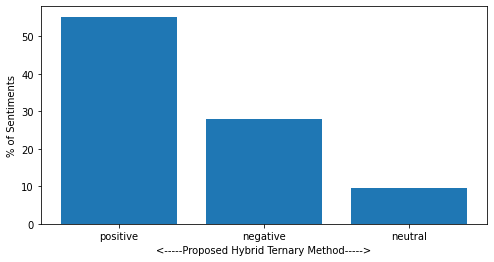

In [59]:
val_count = ((df2['joint_label'].value_counts()/df2.shape[0])*100)
#val_count = ((df2['tlabel'].value_counts()/df2.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Proposed Hybrid Ternary Method----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
#plt.title("% Sentiments of Data Distribution")

In [ ]:
#tav_mode1 Majority vote -1,1,0 return usually positive, tav_mode1 return neutral
def getLabel(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#df2['mv3l']=df2['mv3'].apply(getLabel)
df2['m3l']=df2['m3'].apply(getLabel)
#print(df2)
val_count = ((df2['mv3l'].value_counts()/df2.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Proposed Hybrid Ternary Method----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
#plt.title("% Sentiments of Data Distribution")

In [33]:
df_merg1.to_csv('./simpson_text_object_class and_short_engtext.csv', index=False)


In [9]:
df1=pd.DataFrame()
df1[['text','label']]=edf[['classes_with_ctext','joint_label']] 
#df1[['text','label']]=df_merg[['clean_classes_and_ctext','jlabel']] 
dummy=pd.get_dummies(df1['label'])
df=pd.concat([df1,dummy],axis='columns')
df.drop(['label'], axis='columns', inplace=True)
df['text'].replace('', np.nan, inplace=True)
df=df.dropna()
df=df.drop_duplicates()
print(df)

                                                   text  negative  neutral  \
3     person skateboardescort we have a young and en...         0        0   
4     person chair person tv person tv tvrt chrisash...         0        0   
5     person cell phonert babeshawnmendes that was r...         0        0   
6     person person person person person person pers...         0        0   
8     person person tielook at their photo and feel ...         0        0   
...                                                 ...       ...      ...   
4683  personrt learnstweet mom expected normal twins...         1        0   
4687  personrt tipsfunnyfunny woman announces pregna...         1        0   
4689  person tie person person person person person ...         0        0   
4694  person vase person personyeh hai mohabbatein r...         1        0   
4700  person person person person person tie bottler...         0        0   

      positive  
3            1  
4            1  
5           

In [11]:
#y=df[['NEGATIVE','POSITIVE']]
#y=df[['Negative','Neutral','Positive']]
y=df[['negative','neutral','positive']]
#print(y)

In [13]:
#Training and Text Spliting
def load_tarin_test_dataset():
    #df=pd.read_csv('data_tlj07.csv', encoding='latin-1', error_bad_lines= False)
    df['text']=df['text'].astype(str)
    random_idx_list = [random.randint(1,len(df['text'])) for i in range(10)]
    train_data, test_data = train_test_split(df['text'], test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set


    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data)
    #tokenizer1.fit_on_texts(test_data)

    word_index = tokenizer.word_index
    vocab_size = len(tokenizer.word_index) + 1
    #print("Vocabulary Size :", vocab_size)

    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data), maxlen = MAX_SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data), maxlen = MAX_SEQUENCE_LENGTH)
    y_train, y_test = train_test_split(y, test_size=1-TRAIN_SIZE,random_state=7) # Splits Dataset into Training and Testing set 
    #y_train, y_test = train_test_split(df['POSITIVE'], test_size=1-TRAIN_SIZE,random_state=7)
    
    return x_train,x_test,y_train,y_test,vocab_size,word_index







In [ ]:
#from pn_train_test_j02 import load_tarin_test_dataset

In [14]:
x_train,x_test,y_train,y_test,vocab_size,word_index=load_tarin_test_dataset()

In [15]:
print("Vocabulary Size :", vocab_size)
print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Vocabulary Size : 8938
Training X Shape: (1645, 30)
Testing X Shape: (412, 30)
y_train shape: (1645, 3)
y_test shape: (412, 3)


In [60]:
train_data

,ID,text_x,text_label,image_label,ctext,img_path,object_list,object_score,bbox,classes,...,number_of_classes,classes_with_ctext,joint_label,wrt_text,ruser,rpun,ruafin_score,af,afu,afc
569,597,"RT @Nabulax: The attacker was shouting ""I am y...",negative,negative,rt nabulax the attacker was shouting i am your...,597.jpg,person cell phone,"['1.00', '0.84']","[(9.771978378295898, 7.984528541564941, 579.76...","['person', 'cell phone']",...,2,person cell phonert nabulax the attacker was s...,negative,"@Nabulax: The attacker was shouting ""I am your...",": The attacker was shouting ""I am your god, I ...",The attacker was shouting I am your god I am y...,-3.0,Negative,Negative,Negative
588,616,Strong night ahead with the beauty that is @Lo...,positive,positive,strong night ahead with the beauty that is lou...,616.jpg,person chair knife person person dining table ...,"['1.00', '0.88', '0.87', '1.00', '0.72', '0.83...","[(143.6799774169922, 268.560546875, 203.145706...","['person', 'chair', 'knife', 'dining table', '...",...,5,person chair knife person person dining table ...,positive,Strong night ahead with the beauty that is @Lo...,Strong night ahead with the beauty that is,Strong night ahead with the beauty that is,3.0,Positive,Positive,Positive
1292,1337,"""Time to go on a #furious #Korbel Bendah!"" The...",positive,positive,time to go on a furious korbel bendah the bost...,1337.jpg,person cup person person person cell phone cel...,"['0.99', '0.99', '0.99', '0.92', '0.99', '0.82...","[(12.637615203857422, 74.32022857666016, 250.6...","['person', 'cup', 'cell phone']",...,3,person cup person person person cell phone cel...,positive,"""Time to go on a #furious #Korbel Bendah!"" The...","""Time to go on a Bendah!"" The Ranter.",Time to go on a Bendah The Ranter,-6.0,Negative,Negative,Negative
518,545,RT @lucyhale: Â¡Â°@LateNightSeth: An ex-girlfr...,positive,positive,rt lucyhale latenightseth an exgirlfriend scor...,545.jpg,tie person tie person,"['1.00', '1.00', '1.00', '1.00']","[(294.17425537109375, 406.56072998046875, 316....","['tie', 'person']",...,2,tie person tie personrt lucyhale latenightseth...,positive,@lucyhale: Â¡Â°@LateNightSeth: An ex-girlfrien...,: Â¡Â°: An ex-girlfriend scorned is capable of...,An ex girlfriend scorned is capable of anythin...,1.0,Positive,Positive,Positive
4580,5004,#PPSellsBabyParts for a large profit so their ...,negative,negative,ppsellsbabyparts for a large profit so their e...,5004.jpg,chair person cup person person person cup pers...,"['0.72', '0.76', '1.00', '0.74', '0.76', '0.79...","[(441.7685546875, 20.549488067626953, 599.5432...","['chair', 'person', 'cup']",...,3,chair person cup person person person cup pers...,negative,#PPSellsBabyParts for a large profit so their ...,for a large profit so their employees can liv...,for a large profit so their employees can live...,-1.0,Negative,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,465,RT @KimXiFTW: Â¡Â°@LettemeLove: Truly overjoye...,positive,positive,rt kimxiftw lettemelove truly overjoyed tearso...,465.jpg,kite kite person kite person kite kite kite ki...,"['0.85', '0.96', '0.92', '0.93', '0.71', '0.95...","[(225.26039123535156, 135.68186950683594, 233....","['kite', 'person', 'truck']",...,3,kite kite person kite person kite kite kite ki...,positive,@KimXiFTW: Â¡Â°@LettemeLove: Truly overjoyed!!...,": Â¡Â°: Truly overjoyed!!! ??? Kimmy,you're ...",Truly overjoyed Kimmy you re one blessed lady,4.0,Positive,Positive,Positive
3313,3660,"Just to be spiteful, @NaakiiChan. :D",positive,positive,just to be spiteful naakiichan d,3660.jpg,book person person refrigerator book,"['0.83', '0.98', '1.00', '0.97', '0.88']","[(312.3025817871094, 0.0582575798034668, 599.6...","['book', 'person', 'refrigerator']",...,3,book person person refrigerator bookjust to be...,positive,"Just to be spiteful, @NaakiiChan. :D","Just to be spiteful, . :D",Just to be spiteful D,-2.0,Negative,Negative,Nega

In [61]:
#Training and Text Spliting
def load_tarin_test_hybrid():
    #df=pd.read_csv('data_tlj07.csv', encoding='latin-1', error_bad_lines= False)
    #df['text']=df['text'].astype(str)
    #random_idx_list = [random.randint(1,len(df['text'])) for i in range(10)]
    #train_data, test_data = train_test_split(edf, test_size=1-TRAIN_SIZE,random_state=7)
    df2['ctext']=df2['ctext'].astype(str)
    train_data, test_data = train_test_split(df2, test_size=1-TRAIN_SIZE,random_state=7)
    # Splits Dataset into Training and Testing set


    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data['ctext'])
    #tokenizer1.fit_on_texts(test_data)

    word_index = tokenizer.word_index
    vocab_size = len(tokenizer.word_index) + 1
    #print("Vocabulary Size :", vocab_size)

    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['ctext']), maxlen = MAX_SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['ctext']), maxlen = MAX_SEQUENCE_LENGTH)
    y_train, y_test = train_test_split(y, test_size=1-TRAIN_SIZE,random_state=7) # Splits Dataset into Training and Testing set 
    #y_train, y_test = train_test_split(df['POSITIVE'], test_size=1-TRAIN_SIZE,random_state=7)
    y_train=pd.get_dummies(train_data['af'])
    y_test=pd.get_dummies(test_data['text_label'])
    return x_train,x_test,y_train,y_test,vocab_size,word_index

x_train,x_test,y_train,y_test,vocab_size,word_index=load_tarin_test_hybrid()
print("Vocabulary Size :", vocab_size)
print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Vocabulary Size : 15259
Training X Shape: (3760, 30)
Testing X Shape: (941, 30)
y_train shape: (3760, 3)
y_test shape: (941, 3)


In [16]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Flatten,Dropout,GlobalMaxPool1D,MaxPooling1D,Concatenate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.python.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools
#import time
#import sys


In [17]:
#GLOVE_EMB = 'glove.6B.300d.txt'
GLOVE_EMB = '../input/glove6b300dtxt/glove.6B.300d.txt'
EMBEDDING_DIM = 300
#GLOVE_EMB = 'glove.twitter.27B.100d.txt'
#EMBEDDING_DIM = 100
LR = 1e-3
#BATCH_SIZE = 1024
#BATCH_SIZE = 512
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'
MAX_SEQUENCE_LENGTH=30

In [18]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f :
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [62]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [63]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

Epoch 1/8
118/118 [==============================] - 41s 298ms/step - loss: 1.0153 - categorical_accuracy: 0.4851 - val_loss: 0.8909 - val_categorical_accuracy: 0.5834
Epoch 2/8
118/118 [==============================] - 34s 290ms/step - loss: 0.8589 - categorical_accuracy: 0.6181 - val_loss: 0.8486 - val_categorical_accuracy: 0.6047
Epoch 3/8
118/118 [==============================] - 34s 286ms/step - loss: 0.7818 - categorical_accuracy: 0.6636 - val_loss: 0.8527 - val_categorical_accuracy: 0.5951
Epoch 4/8
118/118 [==============================] - 34s 288ms/step - loss: 0.7275 - categorical_accuracy: 0.6957 - val_loss: 0.8954 - val_categorical_accuracy: 0.6068
Epoch 5/8
118/118 [==============================] - 34s 292ms/step - loss: 0.6654 - categorical_accuracy: 0.7324 - val_loss: 0.8521 - val_categorical_accuracy: 0.6174
Epoch 6/8
118/118 [==============================] - 34s 288ms/step - loss: 0.6040 - categorical_accuracy: 0.7681 - val_loss: 0.9645 - val_categorical_accuracy:

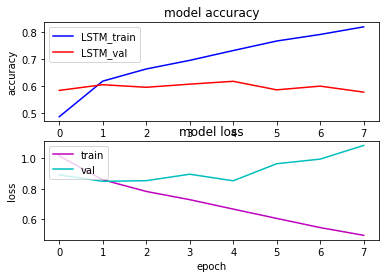

In [80]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#x = SpatialDropout1D(0.5)(embedding_sequences)
#x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(100, dropout=0.2,recurrent_dropout=0.2))(embedding_sequences)#(x)#
#x = Bidirectional(LSTM(64))(embedding_sequences)#(x)
#x = Bidirectional(LSTM(64))(x)
x = Dense(32, activation='relu')(x)
#x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)
#outputs = Dense(3, activation='sigmoid')(x)
modelse= tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelse.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

historyse = modelse.fit(x_train, y_train, epochs=8, batch_size=32,validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historyse.history['categorical_accuracy'], c= 'b')
at.plot(historyse.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historyse.history['loss'], c='m')
al.plot(historyse.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelse.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
#print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True,average ='macro')*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)



Epoch 1/10
71/71 [==============================] - 62s 668ms/step - loss: 5.3828 - categorical_accuracy: 0.3804 - val_loss: 4.9927 - val_categorical_accuracy: 0.4496
Epoch 2/10
71/71 [==============================] - 47s 656ms/step - loss: 4.7065 - categorical_accuracy: 0.4566 - val_loss: 4.4043 - val_categorical_accuracy: 0.5027
Epoch 3/10
71/71 [==============================] - 47s 665ms/step - loss: 4.1671 - categorical_accuracy: 0.4965 - val_loss: 3.9169 - val_categorical_accuracy: 0.5239
Epoch 4/10
71/71 [==============================] - 46s 650ms/step - loss: 3.6945 - categorical_accuracy: 0.5359 - val_loss: 3.4956 - val_categorical_accuracy: 0.5504
Epoch 5/10
71/71 [==============================] - 46s 652ms/step - loss: 3.3103 - categorical_accuracy: 0.5655 - val_loss: 3.1594 - val_categorical_accuracy: 0.5593
Epoch 6/10
71/71 [==============================] - 46s 651ms/step - loss: 3.0112 - categorical_accuracy: 0.5837 - val_loss: 2.8765 - val_categorical_accuracy: 0.591

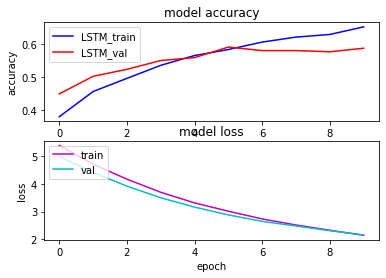

In [47]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
s = SpatialDropout1D(0.2)(embedding_sequences)
#x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(200, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))(s)
#x = Bidirectional(LSTM(200,dropout=0.2, recurrent_dropout=0.2))(x)
#x = Dense(64, activation='relu')(x)
#x = Conv1D(128, 3, activation='relu
y=Conv1D(200, 5,padding='same', kernel_initializer='he_uniform')(s)
#y=Conv1D(150, 5,padding='same',activation='relu')(s)
#y=Conv1D(100, 5,padding='same',activation='relu')(y)
y= GlobalMaxPool1D()(y)
#y1=Conv1D(200, 5, padding='same', kernel_initializer='he_uniform', activation='relu')(s)
#y1= GlobalMaxPool1D()(y1)
#y2=Conv1D(64, 5, padding='same', kernel_initializer='he_uniform', activation='relu')(s)
#x = LSTM(32, dropout=0.2, recurrent_dropout=0.2)(x)
#y2= GlobalMaxPool1D()(y2)
z = Concatenate()([y, x])
#z = Dense(256,activation='relu')(z)
z = Dense(256,kernel_regularizer=regularizers.l2(0.01),activation='relu')(z)
z = Dense(64, kernel_regularizer=regularizers.l2(0.01),activation='relu')(z)
z = Dropout(0.5)(z)
#x = Dense(32, activation='relu')(x)
outputs = Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='softmax')(z)
modelse= tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelse.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

historyse = modelse.fit(x_train, y_train, epochs=10,batch_size=32, validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historyse.history['categorical_accuracy'], c= 'b')
at.plot(historyse.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historyse.history['loss'], c='m')
al.plot(historyse.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelse.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)



Epoch 1/5
71/71 [==============================] - 41s 371ms/step - loss: 1.0944 - categorical_accuracy: 0.3645 - val_loss: 1.0778 - val_categorical_accuracy: 0.4619
Epoch 2/5
71/71 [==============================] - 26s 360ms/step - loss: 1.0701 - categorical_accuracy: 0.4446 - val_loss: 1.0500 - val_categorical_accuracy: 0.4814
Epoch 3/5
71/71 [==============================] - 25s 347ms/step - loss: 1.0466 - categorical_accuracy: 0.4836 - val_loss: 1.0240 - val_categorical_accuracy: 0.4938
Epoch 4/5
71/71 [==============================] - 26s 366ms/step - loss: 1.0214 - categorical_accuracy: 0.5004 - val_loss: 0.9969 - val_categorical_accuracy: 0.5044
Epoch 5/5
71/71 [==============================] - 25s 355ms/step - loss: 0.9982 - categorical_accuracy: 0.5159 - val_loss: 0.9694 - val_categorical_accuracy: 0.5274
Accuracy =  22.300884955752213
Precision_Score  %: 69.27166400850612
F1_Score         %: 34.18510568342298
Recall_Score     %: 23.65120889131075


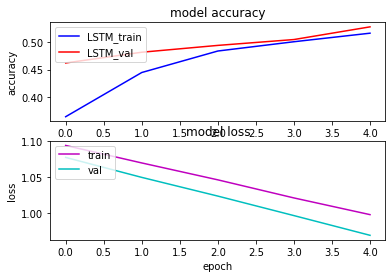

In [65]:
#considered
#Afinn labelling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#x = SpatialDropout1D(0.2)(embedding_sequences)
#x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(100, dropout=0.2,recurrent_dropout=0.2,return_sequences=True))(embedding_sequences)
x = Bidirectional(LSTM(100, dropout=0.2,recurrent_dropout=0.2))(x)

#x = Bidirectional(LSTM(32, dropout=0.2,recurrent_dropout=0.2))(x)
#x = Bidirectional(LSTM(100))(embedding_sequences)#(x)
#x = Bidirectional(LSTM(64, dropout=0.4))(x)
#x = Dense(64,kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
#x = Dense(64,kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
#x = Dense(64,activation='relu')(x)
#x = Dropout(0.2)(x)
x = Dense(32,activation='relu')(x)
x = Dropout(0.2)(x)
#x = Dense(32)(x)
outputs = Dense(3, activation='softmax')(x)
modelse= tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelse.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

historyse = modelse.fit(x_train, y_train, epochs=5, batch_size=32,validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historyse.history['categorical_accuracy'], c= 'b')
at.plot(historyse.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historyse.history['loss'], c='m')
al.plot(historyse.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelse.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
#print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True,average ='macro')*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)



Epoch 1/10
71/71 [==============================] - 16s 130ms/step - loss: 1.0835 - categorical_accuracy: 0.3849 - val_loss: 1.0406 - val_categorical_accuracy: 0.4938
Epoch 2/10
71/71 [==============================] - 7s 93ms/step - loss: 1.0460 - categorical_accuracy: 0.4393 - val_loss: 0.9922 - val_categorical_accuracy: 0.5345
Epoch 3/10
71/71 [==============================] - 6s 91ms/step - loss: 1.0200 - categorical_accuracy: 0.4610 - val_loss: 0.9632 - val_categorical_accuracy: 0.5504
Epoch 4/10
71/71 [==============================] - 7s 104ms/step - loss: 0.9914 - categorical_accuracy: 0.5049 - val_loss: 0.9385 - val_categorical_accuracy: 0.5788
Epoch 5/10
71/71 [==============================] - 7s 93ms/step - loss: 0.9651 - categorical_accuracy: 0.5385 - val_loss: 0.9163 - val_categorical_accuracy: 0.5575
Epoch 6/10
71/71 [==============================] - 7s 94ms/step - loss: 0.9204 - categorical_accuracy: 0.5611 - val_loss: 0.9071 - val_categorical_accuracy: 0.5982
Epoch 7

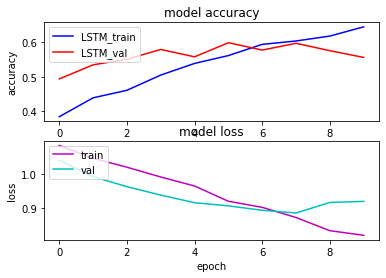

In [67]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#x = SpatialDropout1D(0.5)(embedding_sequences)
#x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(32, dropout=0.5,recurrent_dropout=0.5))(embedding_sequences)#(x)(x)
#x = Bidirectional(LSTM(64))(embedding_sequences)#(x)
#x = Bidirectional(LSTM(64, dropout=0.4))(x)
x = Dense(32, activation='relu')(x)
#x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)
modelse= tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelse.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

historyse = modelse.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historyse.history['categorical_accuracy'], c= 'b')
at.plot(historyse.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historyse.history['loss'], c='m')
al.plot(historyse.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelse.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
#print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True,average ='macro')*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)



Epoch 1/10
71/71 [==============================] - 1s 11ms/step - loss: 1.1903 - categorical_accuracy: 0.3291 - val_loss: 1.0880 - val_categorical_accuracy: 0.3905
Epoch 2/10
71/71 [==============================] - 1s 9ms/step - loss: 1.0907 - categorical_accuracy: 0.3759 - val_loss: 1.0842 - val_categorical_accuracy: 0.4028
Epoch 3/10
71/71 [==============================] - 1s 9ms/step - loss: 1.0807 - categorical_accuracy: 0.3887 - val_loss: 1.0865 - val_categorical_accuracy: 0.3799
Epoch 4/10
71/71 [==============================] - 1s 9ms/step - loss: 1.0753 - categorical_accuracy: 0.3927 - val_loss: 1.0803 - val_categorical_accuracy: 0.4311
Epoch 5/10
71/71 [==============================] - 1s 9ms/step - loss: 1.0603 - categorical_accuracy: 0.4262 - val_loss: 1.0828 - val_categorical_accuracy: 0.4046
Epoch 6/10
71/71 [==============================] - 1s 9ms/step - loss: 1.0576 - categorical_accuracy: 0.4254 - val_loss: 1.0863 - val_categorical_accuracy: 0.3816
Epoch 7/10
71/7

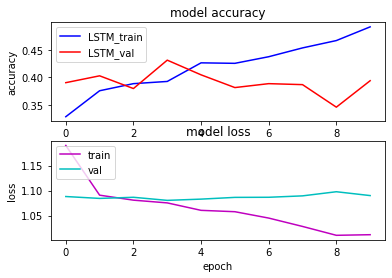

In [71]:
##considered BiLSTM
# with semeval_2017 DS-1 -13
# existing label affin labelling CNN- BiLSTM

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.5)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
#x = Conv1D(128, 5, activation='relu')(x)
#x = Conv1D(64, 5, activation='relu')(x)
x = GlobalMaxPool1D()(x)
#x = Bidirectional(LSTM(64, dropout=0.3,recurrent_dropout=0.3))(x)
#x = Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
x = Dense(64, activation='relu')(x)
#x = Dropout(0.2)(x)
#x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)
modelse= tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelse.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

historyse = modelse.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historyse.history['categorical_accuracy'], c= 'b')
at.plot(historyse.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historyse.history['loss'], c='m')
al.plot(historyse.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelse.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
#print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, average ='macro')*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)



Epoch 1/10
71/71 [==============================] - 17s 138ms/step - loss: 1.0719 - categorical_accuracy: 0.4092 - val_loss: 1.0251 - val_categorical_accuracy: 0.5133
Epoch 2/10
71/71 [==============================] - 8s 112ms/step - loss: 1.0132 - categorical_accuracy: 0.4982 - val_loss: 0.9430 - val_categorical_accuracy: 0.5717
Epoch 3/10
71/71 [==============================] - 8s 114ms/step - loss: 0.9663 - categorical_accuracy: 0.5359 - val_loss: 0.9564 - val_categorical_accuracy: 0.5221
Epoch 4/10
71/71 [==============================] - 8s 112ms/step - loss: 0.9048 - categorical_accuracy: 0.6019 - val_loss: 0.9380 - val_categorical_accuracy: 0.5381
Epoch 5/10
71/71 [==============================] - 9s 122ms/step - loss: 0.8770 - categorical_accuracy: 0.6001 - val_loss: 0.9100 - val_categorical_accuracy: 0.5469
Epoch 6/10
71/71 [==============================] - 8s 112ms/step - loss: 0.8164 - categorical_accuracy: 0.6444 - val_loss: 0.9367 - val_categorical_accuracy: 0.5451
Epo

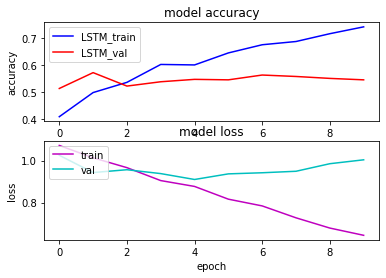

In [29]:
## kaggle_covid19 model Dropout 0.5,0.4,0.4,0.5 to deal overfitting
# vd label
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.4)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4))(x)
#x = LSTM(32, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)
modelvd = tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelvd.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
#print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")
#model.summary()
historyvd = modelvd.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historyvd.history['categorical_accuracy'], c= 'b')
at.plot(historyvd.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historyvd.history['loss'], c='m')
al.plot(historyvd.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelvd.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)



In [ ]:
## kaggle_covid19 model Dropout 0.5,0.4,0.4,0.5 to deal overfitting

In [ ]:
#*******************************************************************

In [ ]:
# with semeval_2016 tweets model Dropout 0.5,0.5,0.5,0.5 to deal overfitting
# m3 label
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.4)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4))(x)
#x = LSTM(32, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)
modelm3 = tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelm3.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
#model.summary()
historym3 = modelm3.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historym3.history['categorical_accuracy'], c= 'b')
at.plot(historym3.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historym3.history['loss'], c='m')
al.plot(historym3.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelm3.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)


In [ ]:
# with semeval_2016 tweets model Dropout 0.5,0.5,0.5,0.5 to deal overfitting
# mv3 label
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.4)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4))(x)
#x = LSTM(32, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)
modelmv3 = tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelmv3.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
#model.summary()
historymv3 = modelmv3.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historymv3.history['categorical_accuracy'], c= 'b')
at.plot(historymv3.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historymv3.history['loss'], c='m')
al.plot(historymv3.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelmv3.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)


In [ ]:
# with semeval_2016 tweets model Dropout 0.5,0.5,0.5,0.5 to deal overfitting
# htl label
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.4)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4))(x)
#x = LSTM(32, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)
modelhtl = tf.keras.Model(sequence_input, outputs)
#Model Compile
from tensorflow.keras.callbacks import ReduceLROnPlateau

modelhtl.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
#model.summary()
historyhtl = modelhtl.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historyhtl.history['categorical_accuracy'], c= 'b')
at.plot(historyhtl.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historyhtl.history['loss'], c='m')
al.plot(historyhtl.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelhtl.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)


In [ ]:
#*********************************************

In [ ]:
#

In [ ]:
#lstm
#1) Embedding Layer - Generates Embedding Vector for each input sequence.

#2) Conv1D Layer - Its using to convolve data into smaller feature vectors.

#3) LSTM - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

#4) Dense - Fully Connected Layers for classification

In [ ]:
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

In [ ]:
vis_arr=(np.asarray(multilabel_confusion_matrix(y_test, ypred1)))
#print(vis_arr)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3))
labels = ["".join("c" + str(i)) for i in range(0, 3)]
#cnf=multilabel_confusion_matrix(y_test, ypred1)    
for axes, cfs_matrix, label in zip(ax, vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["1", "0"])
fig.tight_layout()
#fig.colorbar((print_confusion_matrix(),ax=ax)
plt.show()

In [ ]:

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
#import scikitplot as skplt
#skplt.metrics.plot_confusion_matrix(ytest,ypred1,figsize=(12,12))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, ypred2))
multilabel_confusion_matrix(y_test, ypred2)
vis_arr=(np.asarray(multilabel_confusion_matrix(y_test, ypred2)))
fig, ax = plt.subplots(1, 3, figsize=(8, 3))
labels = ["".join("c" + str(i)) for i in range(0, 3)]
#cnf=multilabel_confusion_matrix(y_test, ypred1)    
for axes, cfs_matrix, label in zip(ax, vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["1", "0"])
fig.tight_layout()
#fig.colorbar((print_confusion_matrix(),ax=ax)
plt.show()

In [ ]:
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
X=df['text']
print(X)
Y=df['Positive']
prin

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc = dc.fit( x_train, y_train)

dc_pred = dc.predict(x_test )
print("Accuracy = ",(accuracy_score(y_test,dc_pred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,dc_pred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, dc_pred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,dc_pred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, dc_pred, average='macro'))*100)

In [ ]:
from sklearn.metrics import jaccard_score
print('                   positive     negative      neutral  ')
print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred2, average=None))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred2, average =None))*100)
print('F1_Score         %:',(f1_score(y_test,ypred2, average=None))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred2, average=None))*100)

In [ ]:
print(classification_report(y_test, ypred2))

In [ ]:
multilabel_confusion_matrix(y_test, ypred2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#lr=LogisticRegression()
#lr = lr.fit( x_train, y_train)
#ypred2 = lr.predict(x_test )
#lr.fit(x_train, y_train)
#lr.score(x_test,y_test)

In [ ]:
#svm=SVC()
#svm.fit(x_train,y_train)
#svm.score(x_test,y_test)

In [ ]:
rf=RandomForesClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

In [ ]:
#TF-Df
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")


In [ ]:
# using GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier=classifier.fit(x_train, y_train)
# predict
#ypred3 = dc.predict(x_test )
gnb_pred = classifier.predict(x_test)
# accuracy
print("Accuracy = ",(accuracy_score(y_test,gnb_pred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,gnb_pred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, gnb_pred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,gnb_pred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, gnb_pred, average='macro'))*100)

In [ ]:
print('                      Negative      Neutral     Positive ')
print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred3, average=None))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred3, average =None))*100)
print('F1_Score         %:',(f1_score(y_test,ypred3, average=None))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred3, average=None))*100)

In [ ]:
# LogisticRegression
#from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train, y_train)
# predict
lr_pred = classifier.predict(x_test)
# accuracy
print("Accuracy = ",(accuracy_score(y_test,lr_pred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,lr_pred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, lr_pred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,lr_pred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, lr_pred, average='macro'))*100)
#Output:
#Accuracy = 0.893333333333

In [ ]:
# using classifier chains RandomForestClassifier

#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from skmultilearn.problem_transform import ClassifierChain
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(RandomForestClassifier())
# Training logistic regression model on train data
classifier.fit(x_train, y_train)
# predict
rf_pred = classifier.predict(x_test)
# accuracy
print("Accuracy = ",(accuracy_score(y_test,rf_pred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,rf_pred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, rf_pred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,rf_pred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, rf_pred, average='macro'))*100)
#Output:
#Accuracy = 0.893333333333

In [ ]:
# using classifier chains
from sklearn.svm import SVC

from skmultilearn.problem_transform import ClassifierChain
# initialize classifier chains multi-label classifier
sv = ClassifierChain(SVC())
# Training logistic regression model on train data
#sv=SVC()
sv.fit(x_train, y_train)
# predict
sv_pred = sv.predict(x_test)
# accuracy
print("Accuracy = ",(accuracy_score(y_test,sv_pred, normalize=True, sample_weight=None)*100))
print('Jaccard Accuracy %:',(jaccard_score(y_test,sv_pred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, sv_pred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,sv_pred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, sv_pred, average='macro'))*100)
#Output:
#Accuracy = 0.893333333333

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds=StraitifiedKfold(n_splits=10)
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score()

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

In [ ]:
#Adapted algorithm for  for multi-label classification concentrate on adapting
#single-label classification algorithms to the multi-label case usually by changes in cost/decision functions.
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")